<a href="https://colab.research.google.com/github/TredNR/data_lab/blob/main/Ex_data_lab_1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1

Ковариация и коэффициент корреляции. Пример методического указания

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sc

In [38]:
x = list(range(-10, 11))

In [39]:
y = [0, 2, 2, 2, 2, 3, 3, 6, 7, 4, 7, 6, 6, 9, 4, 5, 5, 10, 11, 12, 14]

In [40]:
x_, y_ = np.array(x), np.array(y)

In [41]:
x__, y__ = pd.Series(x_), pd.Series(y_)

In [42]:
cov_matrix = np.cov(x_, y_)
cov_matrix

array([[38.5       , 19.95      ],
       [19.95      , 13.91428571]])

In [43]:
cov_xy = cov_matrix[0, 1]
cov_xy

np.float64(19.95)

In [44]:
cov_xy = cov_matrix[1, 0]
cov_xy

np.float64(19.95)

In [45]:
cov_xy = x__.cov(y__)
cov_xy

np.float64(19.95)

In [46]:
cov_xy = y__.cov(x__)
cov_xy

np.float64(19.95)

In [47]:
r, p = sc.stats.pearsonr(x_, y_)

In [48]:
r

np.float64(0.8619500056316061)

In [49]:
p

np.float64(5.122760847201135e-07)

In [50]:
sc.stats.linregress(x_, y_)

LinregressResult(slope=np.float64(0.5181818181818181), intercept=np.float64(5.714285714285714), rvalue=np.float64(0.861950005631606), pvalue=np.float64(5.122760847201164e-07), stderr=np.float64(0.06992387660074979), intercept_stderr=np.float64(0.4234100995002589))

In [52]:
result = sc.stats.linregress(x_, y_)

In [53]:
r = result.rvalue

In [54]:
r

np.float64(0.861950005631606)

In [55]:
r = x__.corr(y__)

In [56]:
r

np.float64(0.8619500056316061)

In [57]:
r = y__.corr(x__)

In [58]:
r

np.float64(0.861950005631606)

## Тестовая задача

Определим простой набор данных из двух переменных, где каждая переменная берется из равномерного распределения (например, негауссова), а значения
второй переменной зависят от значений первого значения.


В частности, выборка из 1000 случайных значений с плавающей запятой берется из равномерного распределения и масштабируется до диапазона от 0 до 20.

Вторая выборка из 1000 случайных значений с плавающей запятой берется из равномерного распределения между 0 и 10 и добавляется к значениям в Первый образец для создания ассоциации.

In [64]:
from numpy.random import rand
from numpy.random import seed
from matplotlib import pyplot

In [65]:
seed(1)

In [66]:
data1 = rand(1000) * 20
data2 = data1 + (rand(1000) * 10)

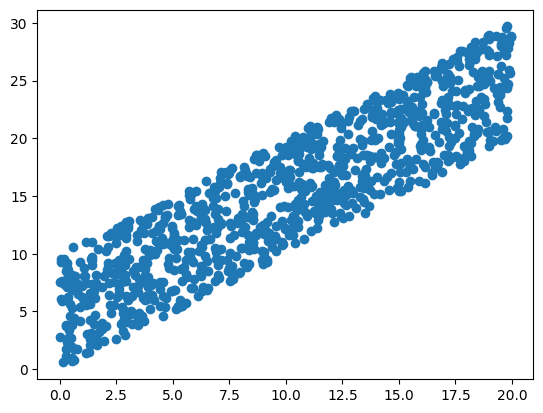

In [67]:
pyplot.scatter(data1, data2)
pyplot.show()

### Ранговая корреляция Спирмена

In [69]:
from scipy.stats import spearmanr

In [70]:
coef, p = spearmanr(data1, data2)
print('Spearmans correlation coefficient: %.3f' % coef)

Spearmans correlation coefficient: 0.900


In [71]:
alpha = 0.05
if p > alpha:
  print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
  print('Samples are correlated (reject H0) p=%.3f' % p)

Samples are correlated (reject H0) p=0.000


### Ранговая корреляция Кендалла

In [72]:
from scipy.stats import kendalltau

In [73]:
coef, p = kendalltau(data1, data2)
print('Kendall correlation coefficient: %.3f' % coef)

Kendall correlation coefficient: 0.709


In [74]:
alpha = 0.05
if p > alpha:
  print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
  print('Samples are correlated (reject H0) p=%.3f' % p)

Samples are correlated (reject H0) p=0.000


### Работа с 2D данными

In [76]:
a = np.array([
    [1, 1, 1],
    [2, 3, 1],
    [4, 9, 2],
    [8, 27, 4],
    [16, 1, 1]
])

print(a)

[[ 1  1  1]
 [ 2  3  1]
 [ 4  9  2]
 [ 8 27  4]
 [16  1  1]]


In [78]:
np.mean(a)

np.float64(5.4)

In [79]:
a.mean()

np.float64(5.4)

In [80]:
np.median(a)

np.float64(2.0)

In [81]:
a.var(ddof=1)

np.float64(53.40000000000001)

In [82]:
np.mean(a, axis=0)

array([6.2, 8.2, 1.8])

In [83]:
a.mean(axis=0)

array([6.2, 8.2, 1.8])

In [84]:
np.mean(a, axis=1)

array([ 1.,  2.,  5., 13.,  6.])

In [86]:
a.mean(axis=1)

array([ 1.,  2.,  5., 13.,  6.])

In [87]:
np.median(a, axis=0)

array([4., 3., 1.])

In [88]:
np.median(a, axis=1)

array([1., 2., 4., 8., 1.])

In [89]:
a.var(axis=0, ddof=1)

array([ 37.2, 121.2,   1.7])

In [91]:
a.var(axis=1, ddof=1)

array([  0.,   1.,  13., 151.,  75.])

In [94]:
sc.stats.gmean(a)  # Default: axis=0

array([4.        , 3.73719282, 1.51571657])

In [95]:
sc.stats.gmean(a, axis=0)

array([4.        , 3.73719282, 1.51571657])

In [96]:
sc.stats.gmean(a, axis=1)

array([1.        , 1.81712059, 4.16016765, 9.52440631, 2.5198421 ])

In [97]:
sc.stats.gmean(a, axis=None)

np.float64(2.829705017016332)

In [98]:
sc.stats.describe(a, axis=None, ddof=1, bias=False)

DescribeResult(nobs=15, minmax=(np.int64(1), np.int64(27)), mean=np.float64(5.4), variance=np.float64(53.40000000000001), skewness=np.float64(2.264965290423389), kurtosis=np.float64(5.212690982795767))

In [99]:
sc.stats.describe(a, ddof=1, bias=False)

DescribeResult(nobs=5, minmax=(array([1, 1, 1]), array([16, 27,  4])), mean=array([6.2, 8.2, 1.8]), variance=array([ 37.2, 121.2,   1.7]), skewness=array([1.32531471, 1.79809454, 1.71439233]), kurtosis=array([1.30376344, 3.14969121, 2.66435986]))

In [100]:
sc.stats.describe(a, axis=1, ddof=1, bias=False)

<ipython-input-100-c3a829280fc9>:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sc.stats.describe(a, axis=1, ddof=1, bias=False)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:1418: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sk = skew(a, axis, bias=bias)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:1419: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(a, axis, bias=bias)


DescribeResult(nobs=3, minmax=(array([1, 1, 2, 4, 1]), array([ 1,  3,  9, 27, 16])), mean=array([ 1.,  2.,  5., 13.,  6.]), variance=array([  0.,   1.,  13., 151.,  75.]), skewness=array([       nan, 0.        , 1.15206964, 1.52787436, 1.73205081]), kurtosis=array([ nan, -1.5, -1.5, -1.5, -1.5]))

In [102]:
result = sc.stats.describe(a, axis=1, ddof=1, bias=False)
result.mean

<ipython-input-102-e2ce6d368a3d>:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  result = sc.stats.describe(a, axis=1, ddof=1, bias=False)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:1418: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  sk = skew(a, axis, bias=bias)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:1419: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurt = kurtosis(a, axis, bias=bias)


array([ 1.,  2.,  5., 13.,  6.])

### Работа с DataFrame

In [104]:
row_names = ['first', 'second', 'third', 'fourth', 'fifth']
col_names = ['A', 'B', 'C']
df = pd.DataFrame(a, index=row_names, columns=col_names)
df

,A,B,C
first,1,1,1
second,2,3,1
third,4,9,2
fourth,8,27,4
fifth,16,1,1


In [105]:
df.mean()

,0
A,6.2
B,8.2
C,1.8


In [106]:
df.var()

,0
A,37.2
B,121.2
C,1.7


In [107]:
df.mean(axis=1)

,0
first,1.0
second,2.0
third,5.0
fourth,13.0
fifth,6.0


In [108]:
df.var(axis=1)

,0
first,0.0
second,1.0
third,13.0
fourth,151.0
fifth,75.0


In [109]:
df['A']

,A
first,1
second,2
third,4
fourth,8
fifth,16


In [111]:
df['A'].mean()

np.float64(6.2)

In [112]:
df['A'].var()

37.20000000000001

In [113]:
df.values

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [114]:
df.to_numpy()

array([[ 1,  1,  1],
       [ 2,  3,  1],
       [ 4,  9,  2],
       [ 8, 27,  4],
       [16,  1,  1]])

In [115]:
df.describe()

,A,B,C
count,5.00000,5.000000,5.00000
mean,6.20000,8.200000,1.80000
std,6.09918,11.009087,1.30384
min,1.00000,1.000000,1.00000
25%,2.00000,1.000000,1.00000
50%,4.00000,3.000000,1.00000
75%,8.00000,9.000000,2.00000
max,16.00000,27.000000,4.00000


In [116]:
df.describe().at['mean', 'A']

np.float64(6.2)

In [117]:
df.describe().at['50%', 'B']

np.float64(3.0)

### Визуализация

In [118]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [119]:
np.random.seed(seed=0)
x = np.random.randn(1000)
y = np.random.randn(100)
z = np.random.randn(10)

<ipython-input-120-ac67a34c93bf>:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot((x, y, z), vert=False, showmeans=True, meanline=True,


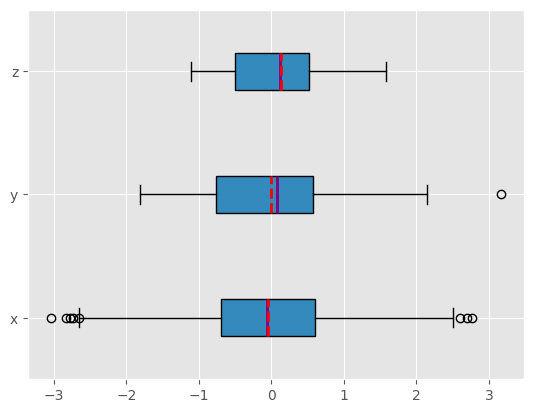

In [120]:
fig, ax = plt.subplots()
ax.boxplot((x, y, z), vert=False, showmeans=True, meanline=True,
labels=('x', 'y', 'z'), patch_artist=True,
medianprops={'linewidth': 2, 'color': 'purple'},
meanprops={'linewidth': 2, 'color': 'red'})
plt.show()

In [121]:
hist, bin_edges = np.histogram(x, bins=10)
print(f'{hist}\n\n{bin_edges}')

[  9  20  70 146 217 239 160  86  38  15]

[-3.04614305 -2.46559324 -1.88504342 -1.3044936  -0.72394379 -0.14339397
  0.43715585  1.01770566  1.59825548  2.1788053   2.75935511]


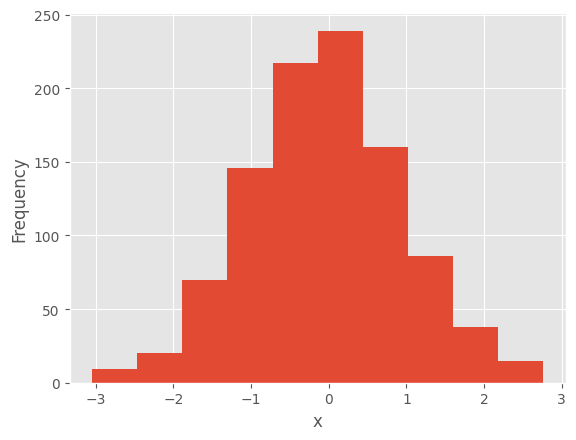

In [122]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=False)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

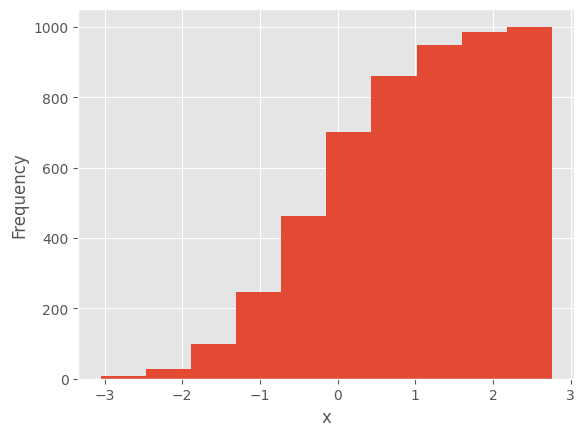

In [123]:
fig, ax = plt.subplots()
ax.hist(x, bin_edges, cumulative=True)
ax.set_xlabel('x')
ax.set_ylabel('Frequency')
plt.show()

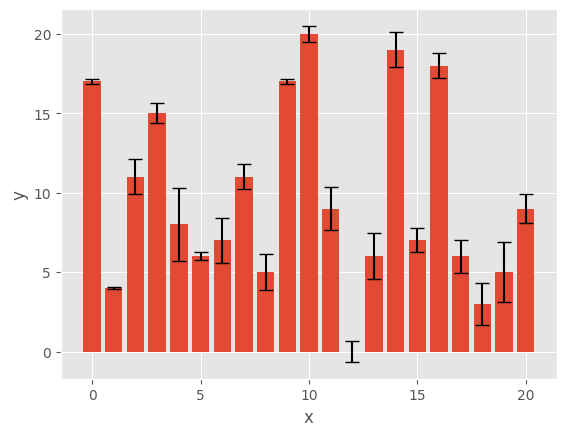

In [131]:
x = np.arange(21)
y = np.random.randint(0, 21, size=21)  # случайные значения от 0 до 20
err = np.abs(np.random.randn(21))  # берем модуль, чтобы убрать отрицательные значения

fig, ax = plt.subplots()
ax.bar(x, y, yerr=err, capsize=5)  # capsize добавляет "шапочки" к погрешностям
ax.set_xlabel('x')
ax.set_ylabel('y')

plt.show()

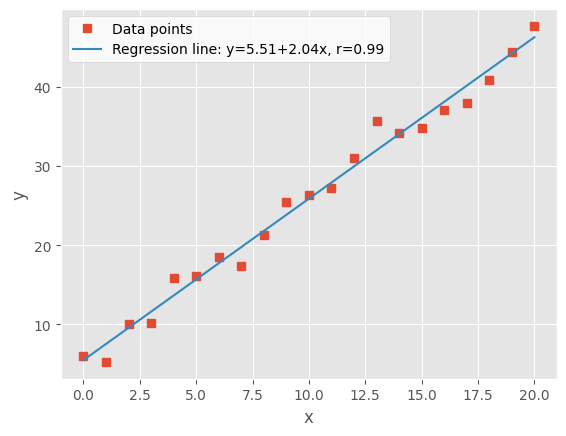

In [133]:
x = np.arange(21)
y = 5 + 2 * x + 2 * np.random.randn(21)
slope, intercept, r, *__ = sc.stats.linregress(x, y)
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

fig, ax = plt.subplots()
ax.plot(x, y, linewidth=0, marker='s', label='Data points')
ax.plot(x, intercept + slope * x, label=line)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend(facecolor='white')
plt.show()

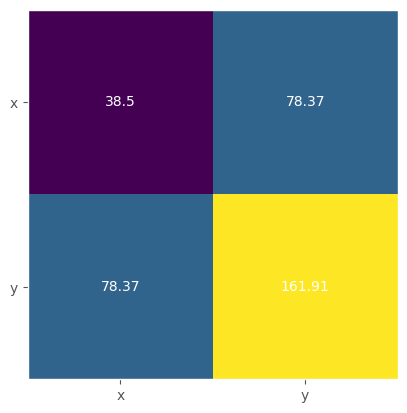

In [134]:
matrix = np.cov(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
  for j in range(2):
    ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()

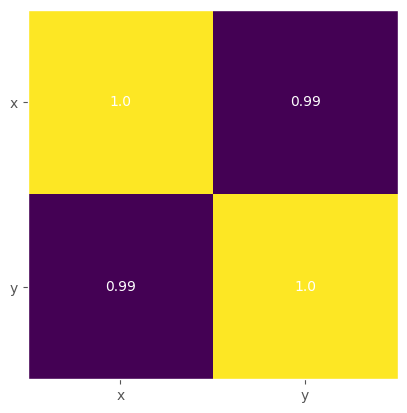

In [135]:
matrix = np.corrcoef(x, y).round(decimals=2)
fig, ax = plt.subplots()
ax.imshow(matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('x', 'y'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
  for j in range(2):
    ax.text(j, i, matrix[i, j], ha='center', va='center', color='w')
plt.show()

# Задание 2

В приложенном файле realty.csv содержатся данные о продаваемых квартирах.

Необходимо рассчитать корреляцию по Пирсону, по Кендаллу и по Спирмену и визуально
показать корреляцию по Пирсону:

1. Между стоимостью квартиры и ее метражом (первая
цифра в соответствующем столбце);
2. Между стоимостью и этажом (первая цифра в
соответствующем столбце);
3. Между стоимостью и количеством комнат.

Аналогичные расчеты выполнить для всех квартир из одного района.

Сравнить полученные результаты для района и для всего города.